# Exploratory Data Analysis (EDA) in Python – Student Exam Score Dataset

This notebook, **`EDA_Project_Rajesh.ipynb`**, performs data cleaning, exploratory data analysis (EDA), and simple feature analysis on the dataset `Exam_Score_Prediction.csv`.

The dataset contains 1000 student records with the following information:

- `student_id` – unique identifier
- `age`
- `gender`
- `course`
- `study_hours`
- `class_attendance`
- `internet_access`
- `sleep_hours`
- `sleep_quality`
- `study_method`
- `facility_rating`
- `exam_difficulty`
- `exam_score`

---

In [1]:
# ---------------------------------------------------
# 1. Import Libraries
# ---------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("ggplot")
sns.set_theme()

# ---------------------------------------------------
# 2. Load Dataset
# ---------------------------------------------------
file_path = "Exam_Score_Prediction.csv"   # ensure this file is in the same folder as this notebook
df = pd.read_csv(file_path)

# Quick look at the first few rows
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


## 2. Initial Inspection & Basic Cleaning

In [2]:
# Shape of the data
print("Shape of the dataset:", df.shape)

# Info about data types and non-null counts
df.info()

# Summary statistics for numerical columns
df.describe()

Shape of the dataset: (20000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [3]:
# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Check duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows if any
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Missing values per column:
student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

Number of duplicate rows: 0
Shape after removing duplicates: (20000, 13)


In [4]:
# Convert student_id to string (ID, not numeric quantity)
df["student_id"] = df["student_id"].astype(str)

# Categorical columns in this dataset
cat_cols = ["gender", "course", "internet_access", "sleep_quality", 
            "study_method", "facility_rating", "exam_difficulty"]

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for gender:
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Value counts for course:
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

Value counts for internet_access:
internet_access
yes    16988
no      3012
Name: count, dtype: int64

Value counts for sleep_quality:
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

Value counts for study_method:
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

Value counts for facility_rating:
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

Value counts for exam_difficulty:
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


## 3. Descriptive Statistics

In [5]:
# Numerical columns
num_cols = ["age", "study_hours", "class_attendance", "sleep_hours", "exam_score"]

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,20000.0,20.473300,2.284458,17.000,18.0,20.00,22.0,24.00
study_hours,20000.0,4.007604,2.308313,0.080,2.0,4.04,6.0,7.91
class_attendance,20000.0,70.017365,17.282262,40.600,55.1,69.90,85.0,99.40
sleep_hours,20000.0,7.008560,1.732090,4.100,5.5,7.00,8.5,9.90
exam_score,20000.0,62.513225,18.908491,19.599,48.8,62.60,76.3,100.00


In [6]:
# Summary statistics for categorical columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].nunique())
    print(df[col].value_counts())


Column: gender
Unique values: 3
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Column: course
Unique values: 7
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

Column: internet_access
Unique values: 2
internet_access
yes    16988
no      3012
Name: count, dtype: int64

Column: sleep_quality
Unique values: 3
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

Column: study_method
Unique values: 5
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

Column: facility_rating
Unique values: 3
facility_rating
medium    6760
low       6638
high      6602
Name: count, dtype: int64

Column: exam_difficulty
Unique values: 3
exam_difficulty
moderate    9878
easy        6141
hard        3981
Name: count, dtype: int64


## 4. Data Visualizations

### 4.1 Histograms / KDE for Numerical Features

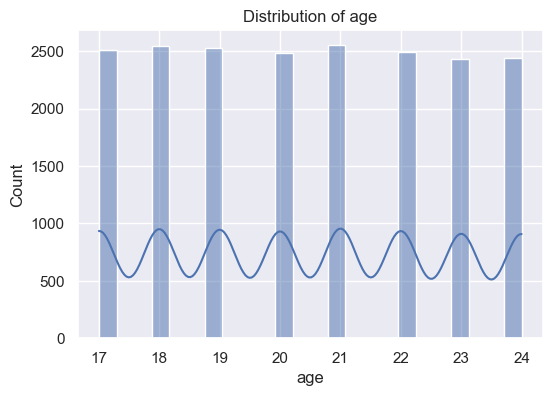

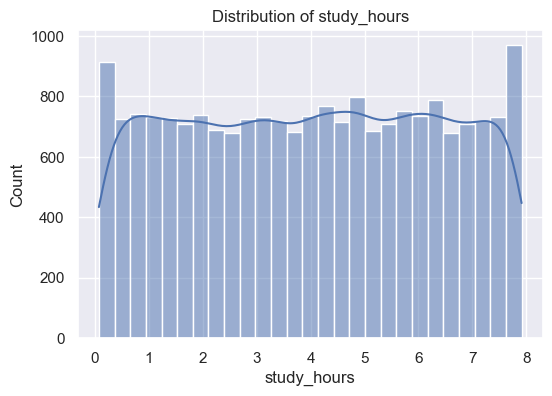

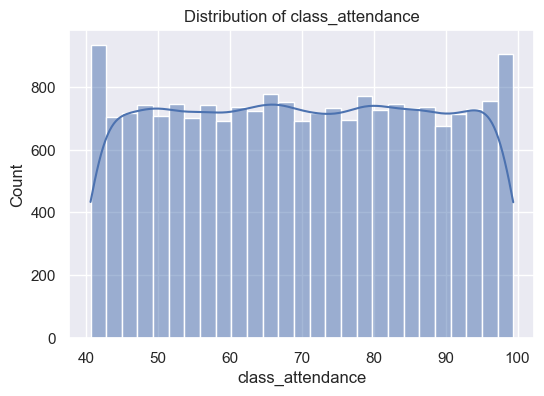

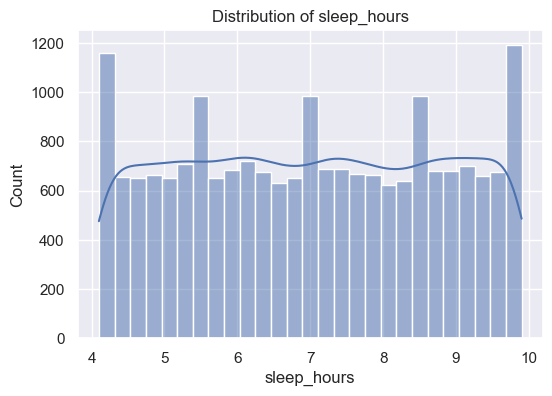

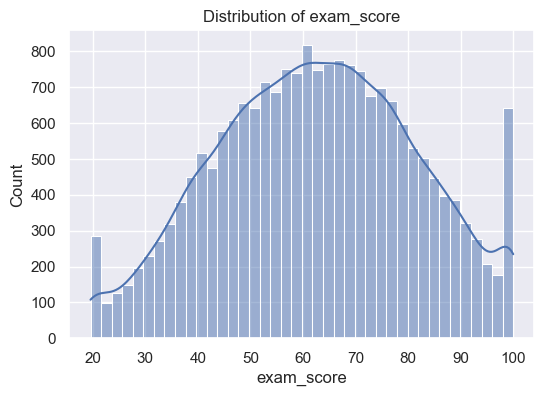

In [7]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### 4.2 Bar Plots for Categorical Features

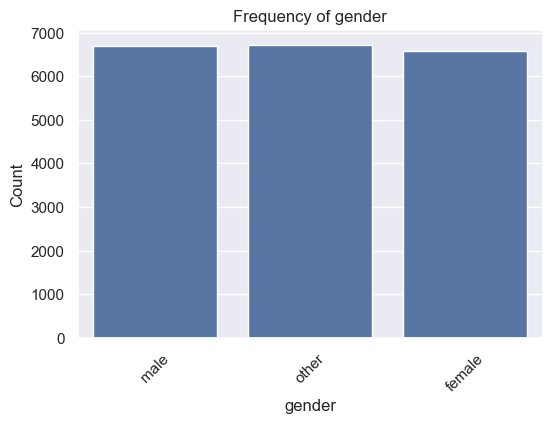

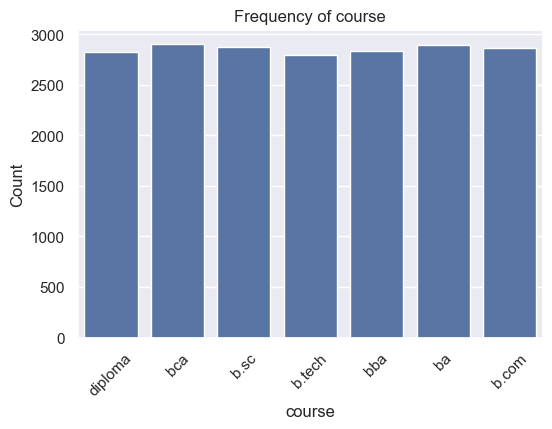

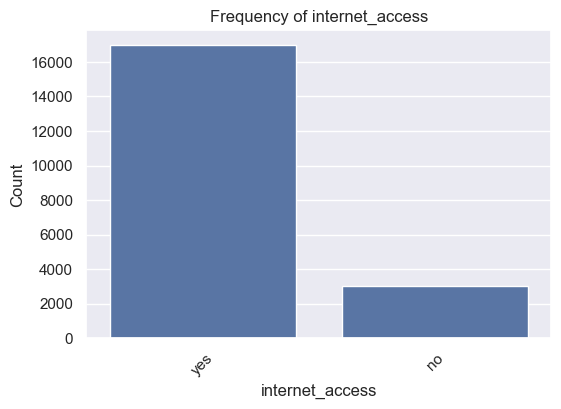

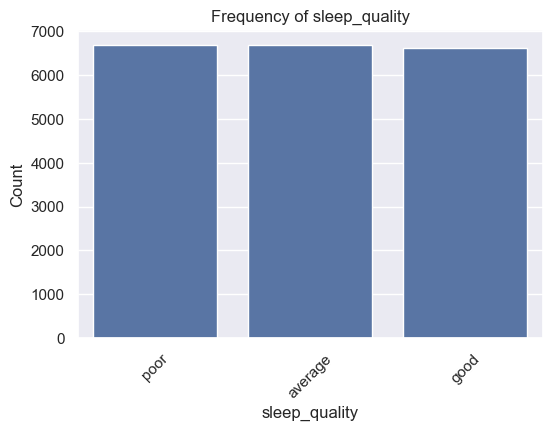

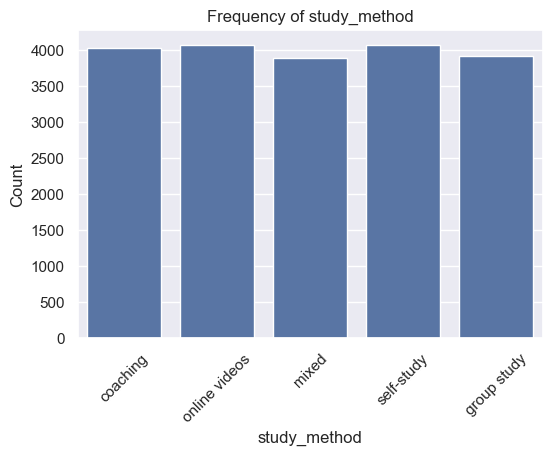

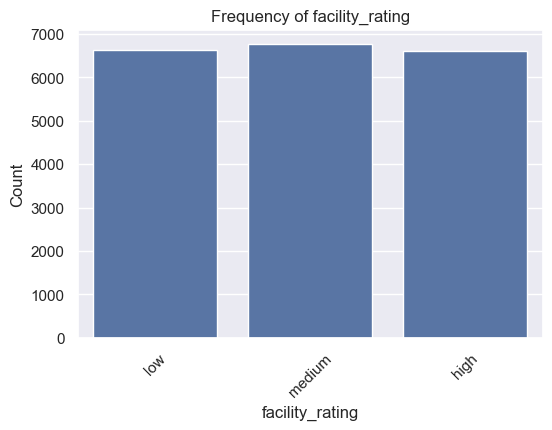

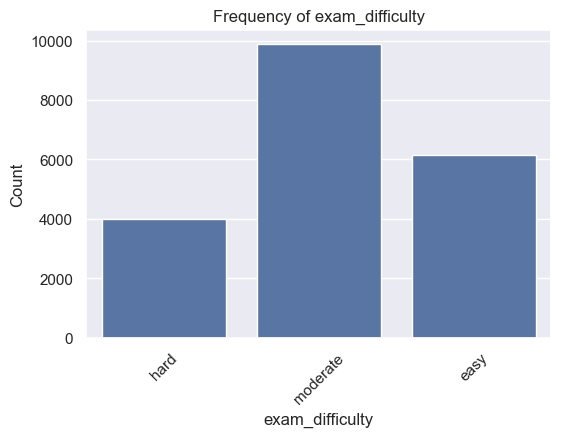

In [8]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()

### 4.3 Box Plots (Outliers & Spread of Exam Score)

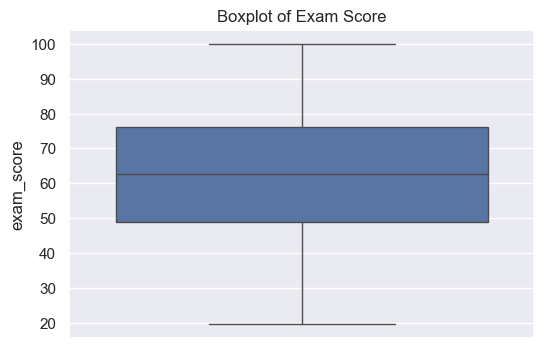

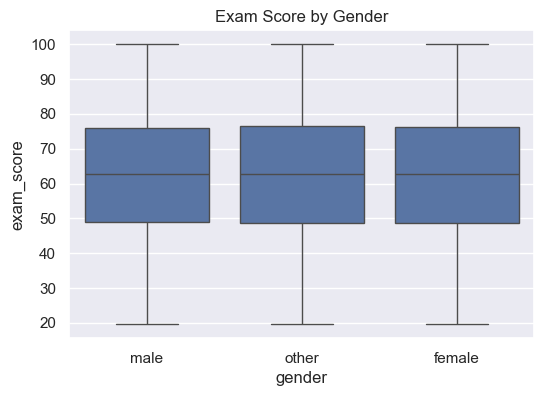

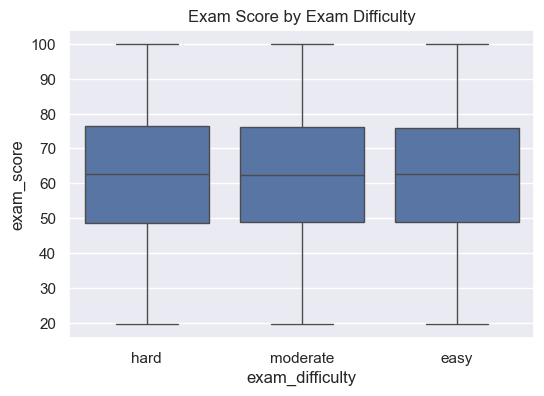

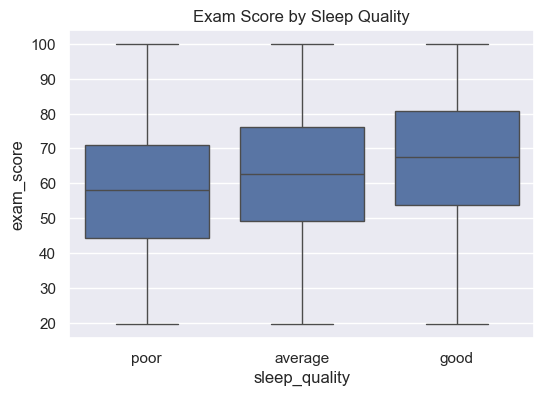

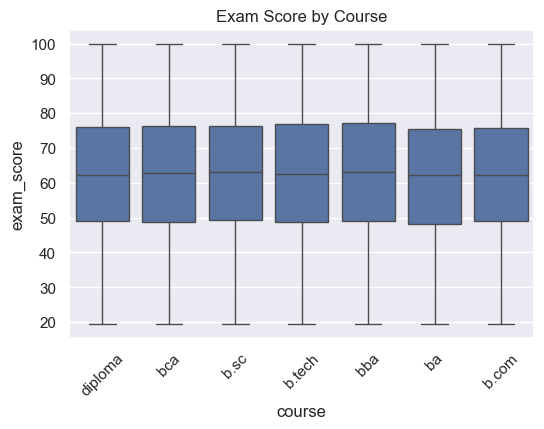

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(y="exam_score", data=df)
plt.title("Boxplot of Exam Score")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="gender", y="exam_score", data=df)
plt.title("Exam Score by Gender")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="exam_difficulty", y="exam_score", data=df)
plt.title("Exam Score by Exam Difficulty")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="sleep_quality", y="exam_score", data=df)
plt.title("Exam Score by Sleep Quality")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="course", y="exam_score", data=df)
plt.title("Exam Score by Course")
plt.xticks(rotation=45)
plt.show()

### 4.4 Scatter Plots (Relationships)

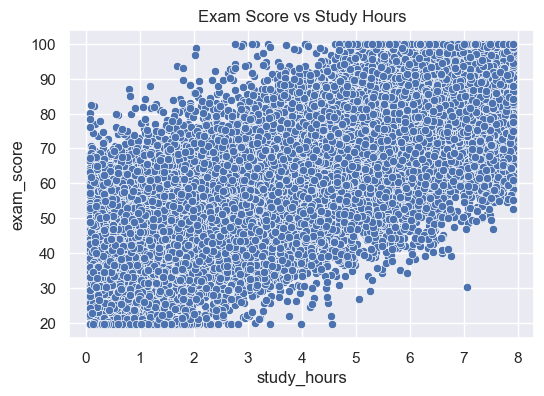

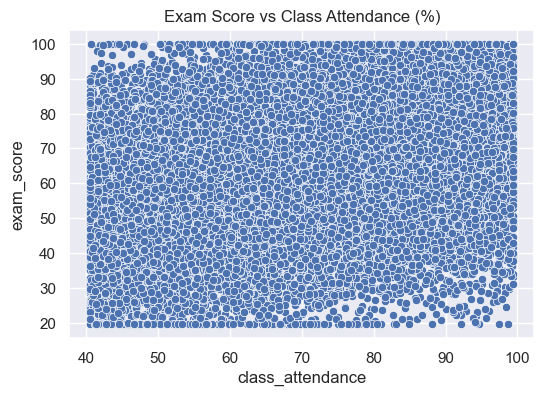

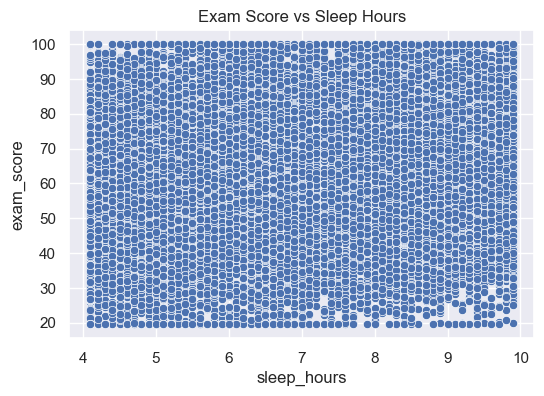

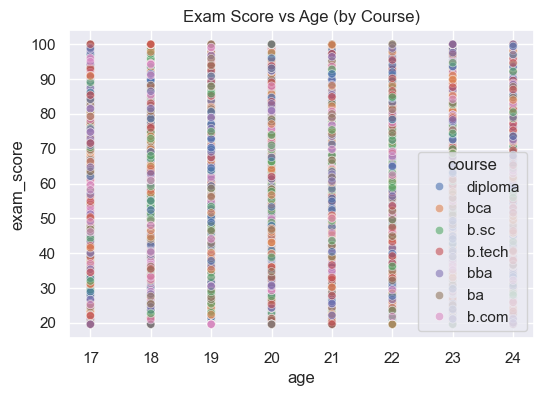

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="study_hours", y="exam_score", data=df)
plt.title("Exam Score vs Study Hours")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="class_attendance", y="exam_score", data=df)
plt.title("Exam Score vs Class Attendance (%)")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="sleep_hours", y="exam_score", data=df)
plt.title("Exam Score vs Sleep Hours")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="age", y="exam_score", data=df, hue="course", alpha=0.6)
plt.title("Exam Score vs Age (by Course)")
plt.show()

### 4.5 Correlation Heatmap

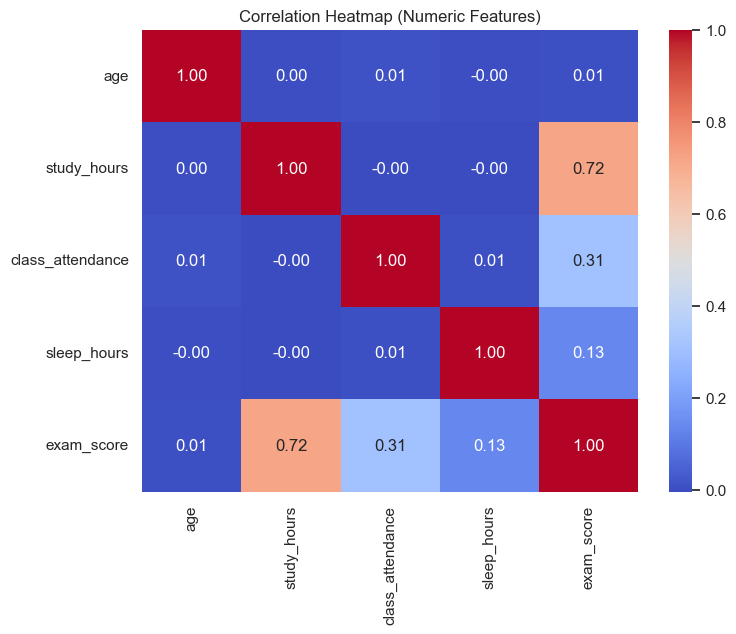

In [11]:
plt.figure(figsize=(8, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

## 5. Group Analysis (GroupBy Operations)

In [12]:
# Average exam score by gender
df.groupby("gender")["exam_score"].agg(["mean", "median", "count"])

,mean,median,count
gender,,,
female,62.582145,62.6,6579
male,62.397480,62.6,6695
other,62.561023,62.6,6726


In [13]:
# Average exam score by course
df.groupby("course")["exam_score"].mean().sort_values(ascending=False)

course
bba        62.928127
b.sc       62.718993
b.tech     62.653529
bca        62.524078
b.com      62.333197
diploma    62.330633
ba         62.112214
Name: exam_score, dtype: float64

In [14]:
# Exam score by exam difficulty
df.groupby("exam_difficulty")["exam_score"].agg(["mean", "count"])

,mean,count
exam_difficulty,,
easy,62.383022,6141
hard,62.629580,3981
moderate,62.547277,9878


In [15]:
# Multi-level grouping: course and exam difficulty
df.groupby(["course", "exam_difficulty"])["exam_score"].mean().unstack()

exam_difficulty,easy,hard,moderate
course,,,
b.com,62.418916,62.444015,62.228552
b.sc,62.533432,62.310195,62.994322
b.tech,62.525389,61.811348,63.068953
ba,61.730393,61.695404,62.516971
bba,62.719811,63.694970,62.753370
bca,62.338973,63.347578,62.320705
diploma,62.433398,63.146014,61.934806


In [16]:
# Impact of internet access on exam score
df.groupby("internet_access")["exam_score"].agg(["mean", "count"])

,mean,count
internet_access,,
no,62.864663,3012
yes,62.450914,16988


## 6. Feature Analysis

### 6.1 Pair Plot for Key Variables

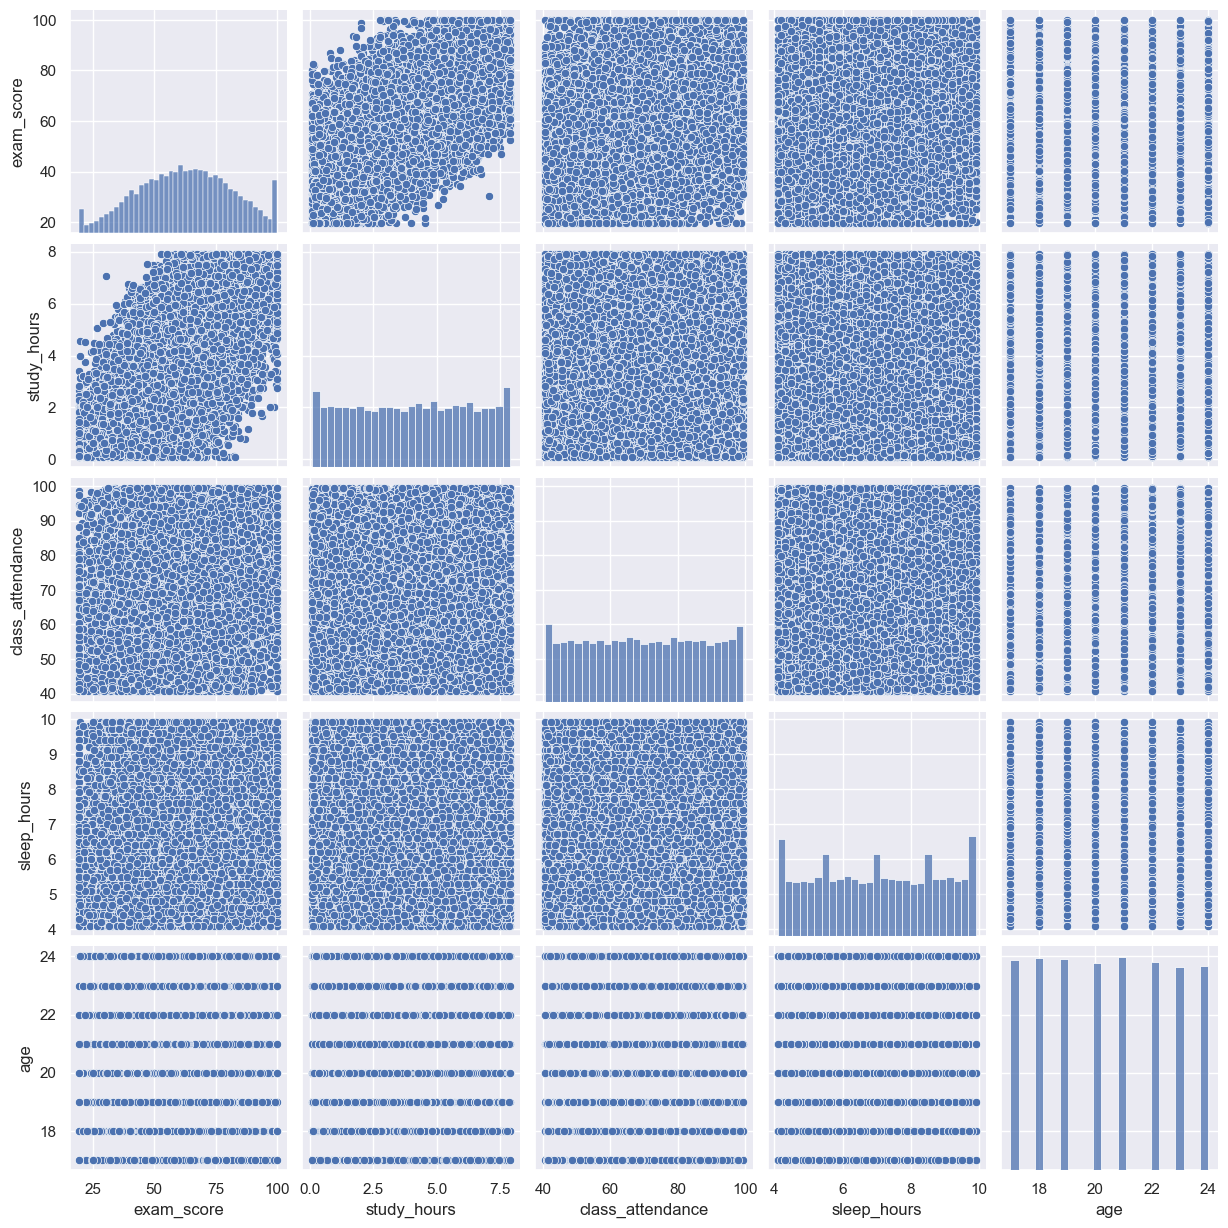

In [17]:
features_for_pairplot = ["exam_score", "study_hours", "class_attendance", "sleep_hours", "age"]

sns.pairplot(df[features_for_pairplot])
plt.show()

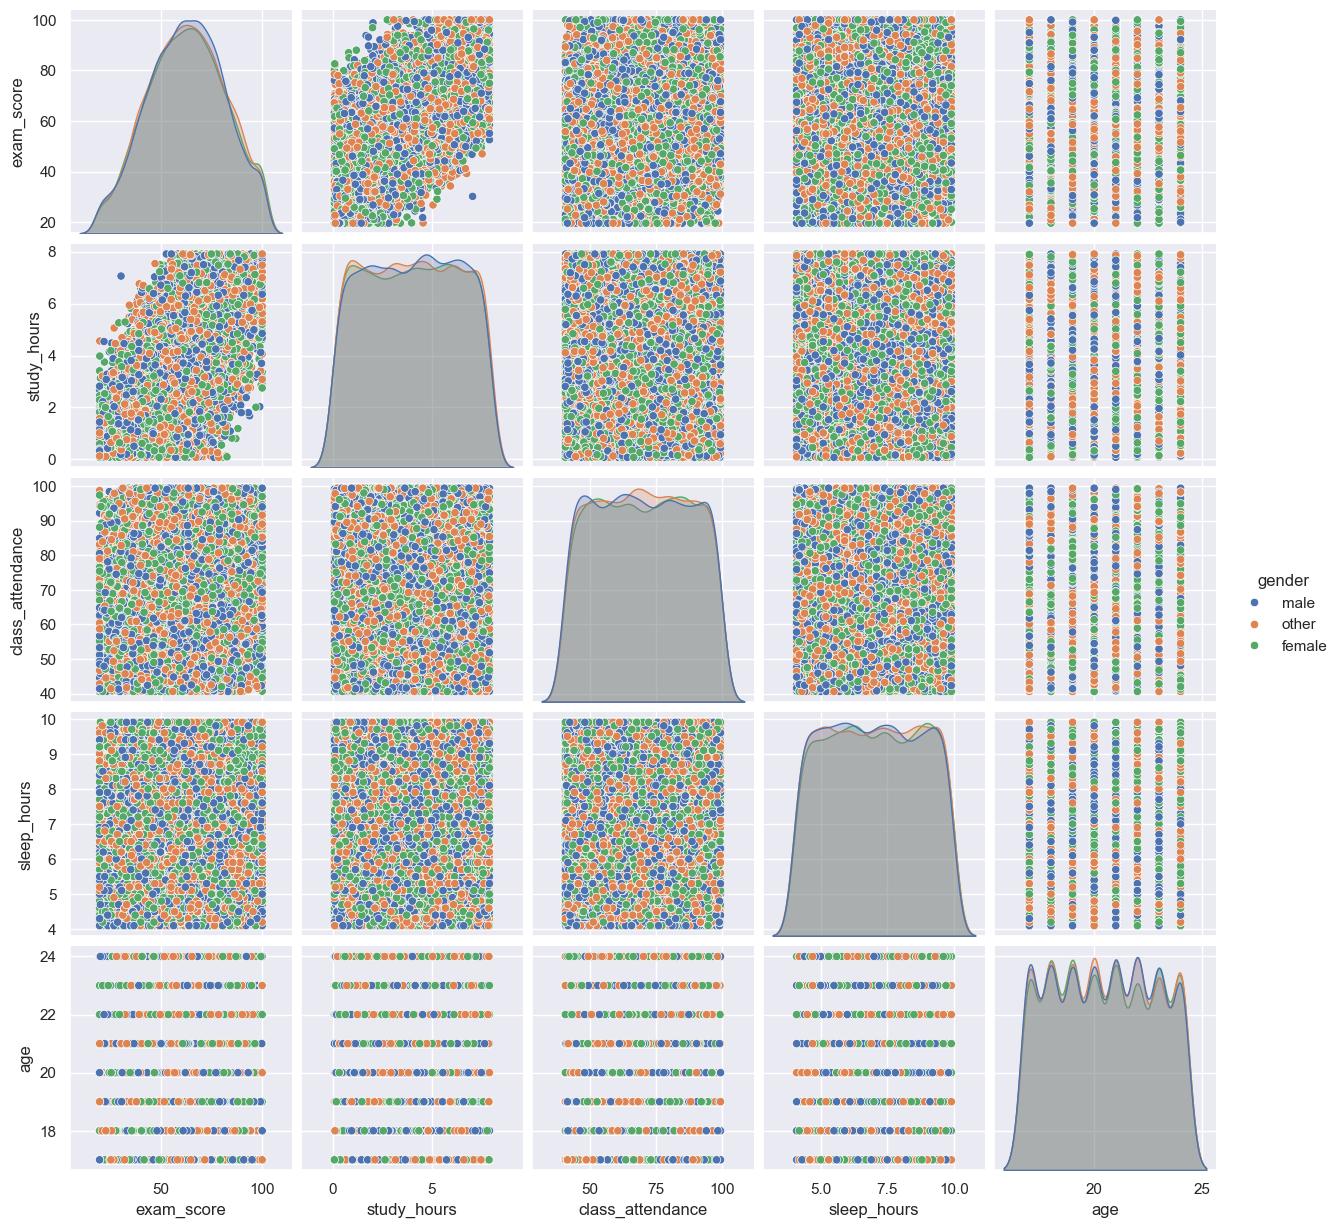

In [18]:
# Pair plot colored by gender
sns.pairplot(df[features_for_pairplot + ["gender"]], hue="gender")
plt.show()

### 6.2 Pivot Table: Sleep Quality vs Exam Difficulty

In [19]:
pivot_sleep_exam = pd.pivot_table(
    df,
    values="exam_score",
    index="sleep_quality",
    columns="exam_difficulty",
    aggfunc="mean"
)
pivot_sleep_exam

exam_difficulty,easy,hard,moderate
sleep_quality,,,
average,62.682492,62.635469,62.394069
good,66.776287,67.325932,67.285824
poor,57.828170,57.969755,57.953137


### 6.3 Correlation with Target (Exam Score)

In [20]:
corr_with_score = df[num_cols].corr()["exam_score"].sort_values(ascending=False)
corr_with_score

exam_score          1.000000
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
Name: exam_score, dtype: float64

## 7. Advanced Python Techniques

### 7.1 Lambda Functions – Binning Exam Score

In [21]:
# Binning exam_score into categories
bins = [0, 50, 75, 100]
labels = ["Low", "Medium", "High"]

df["score_category"] = pd.cut(df["exam_score"], bins=bins, labels=labels, include_lowest=True)
df[["exam_score", "score_category"]].head()

,exam_score,score_category
0,58.9,Medium
1,54.8,Medium
2,90.3,High
3,29.7,Low
4,43.7,Low


In [22]:
# Pass/Fail using lambda
df["result"] = df["exam_score"].apply(lambda x: "Pass" if x >= 40 else "Fail")
df[["exam_score", "result"]].head()

,exam_score,result
0,58.9,Pass
1,54.8,Pass
2,90.3,Pass
3,29.7,Fail
4,43.7,Pass


### 7.2 User-Defined Functions – Study Intensity and Score Range

In [23]:
def categorize_study_hours(hours):
    """Categorizes study hours into Low / Medium / High."""
    if hours < 2:
        return "Low"
    elif 2 <= hours < 4:
        return "Medium"
    else:
        return "High"

df["study_intensity"] = df["study_hours"].apply(categorize_study_hours)
df[["study_hours", "study_intensity"]].head()

,study_hours,study_intensity
0,2.78,Medium
1,3.37,Medium
2,7.88,High
3,0.67,Low
4,0.89,Low


In [24]:
def exam_score_range(score):
    if score < 50:
        return "Low"
    elif 50 <= score < 75:
        return "Medium"
    else:
        return "High"

df["score_range"] = df["exam_score"].apply(exam_score_range)
df[["exam_score", "score_range"]].head()

,exam_score,score_range
0,58.9,Medium
1,54.8,Medium
2,90.3,High
3,29.7,Low
4,43.7,Low


### 7.3 List Comprehensions

In [25]:
# Columns with missing values (for demonstration)
cols_with_missing = [col for col in df.columns if df[col].isna().sum() > 0]
cols_with_missing

[]

In [26]:
# Features highly correlated with exam_score (|corr| > 0.3)
corr_with_score = df[num_cols].corr()["exam_score"]
high_corr_features = [col for col in corr_with_score.index 
                      if (abs(corr_with_score[col]) > 0.3 and col != "exam_score")]
high_corr_features

['study_hours', 'class_attendance']

In [27]:
# List of student IDs with exam_score > 85
high_scorer_ids = [sid for sid, score in zip(df["student_id"], df["exam_score"]) if score > 85]
high_scorer_ids[:10]  # show first 10

['3', '16', '31', '42', '46', '52', '104', '108', '109', '120']

## 8. Conclusion / Key Insights (To Be Filled After Running the Notebook)

Use this section to summarize your findings. For example:

- How do study hours impact exam scores?
- Does sleep quality or sleep duration show any clear pattern with performance?
- How much does exam difficulty affect the final score on average?
- Are there noticeable differences across courses, genders, or study methods?

You can write bullet points here based on the actual results from the analysis above.
